In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf

In [2]:
# Fonte: 
# https://idg.receita.fazenda.gov.br/acesso-rapido/tributos/irpf-imposto-de-renda-pessoa-fisica

# Base de calculo: (aliquota, parcela à deduzir)
d_tabela_2015 = {(0, 1903.98):       (None, None), 
                 (1903.99, 2826.65): (0.075, 142.8), 
                 (2826.65, 3751.05): (0.15, 354.8), 
                 (3751.06, 4664.68): (0.225, 636.13), 
                 (4664.68, inf):     (0.275, 869.36)}


inss_2017 = {(0, 1659.38):       0.08,
             (1659.38, 2765.66): 0.09,
             (2765.67, inf):     0.11}

In [37]:
dependentes = 1


def calc_inss(valor, tabela=inss_2017):
    for chao, teto in tabela.keys():
        if chao <= valor <= teto:
            aliquota = tabela.get((chao, teto))
            return valor*(1-aliquota)


def calc_ir(valor, tabela=d_tabela_2015):
    for chao, teto in tabela.keys():
        if chao <= valor <= teto:
            aliquota, parcela = tabela.get((chao, teto))
            if not aliquota:
                return valor
            return valor*(1-aliquota) + parcela + min(189.59*dependentes*aliquota, 2275.08)

        
bruto = [x for x in range(0,10000)]
inss = [calc_inss(x) for x in bruto]
ir = [calc_ir(x) for x in inss]

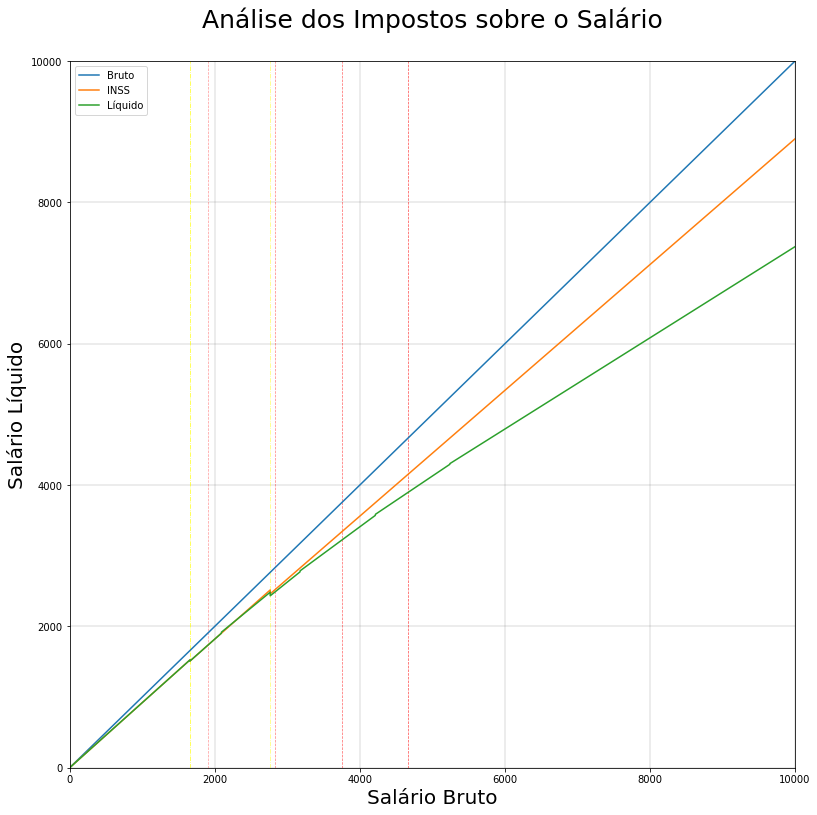

In [57]:
# -------------Formatação-----------------------------------------
plt.figure(figsize=(13, 13))
plt.grid(color='gray', linewidth=0.3, which='both')
# ----------------------------------------------------------------

# -------------Mudança de Aliquota de IR--------------------------
_275 = plt.axvline(x=4664, color='red', alpha=0.7, linewidth=0.7, linestyle='--')
_225 = plt.axvline(x=3751, color='red', alpha=0.6, linewidth=0.7, linestyle='--')
_150 = plt.axvline(x=2826, color='red', alpha=0.5, linewidth=0.7, linestyle='--')
_075 = plt.axvline(x=1903, color='red', alpha=0.4, linewidth=0.7, linestyle='--')
# ---------------------------------------------------------------

# -------------Mudança de Aliquota de INSS-----------------------
plt.axvline(x=1659, color='yellow', alpha=0.9, linewidth=0.7, linestyle='-.')
plt.axvline(x=2756, color='yellow', alpha=0.6, linewidth=0.7, linestyle='-.')
# ---------------------------------------------------------------

# -------------Etiquetas ----------------------------------------
plt.title('Análise dos Impostos sobre o Salário\n', fontsize=25)
plt.ylabel('Salário Líquido', fontsize=20)
plt.xlabel('Salário Bruto', fontsize=20)
# ---------------------------------------------------------------

# -------------Ajustando Origens---------------------------------
ax = plt.gca()
ax.set_ylim(bruto[0], bruto[-1])
ax.set_xlim(bruto[0], bruto[-1])
# ---------------------------------------------------------------

#linha de comparação com http://www.calculador.com.br/calculo/salario-liquido
#plt.axhline(y=4127, color='black', linestyle='-', animated=True)

plt.plot(bruto, label='Bruto')
plt.plot(inss, label='INSS')
plt.plot(ir, label='Líquido')
plt.legend()